In [1]:
import pandas as pd

In [74]:
import numpy as np
import matplotlib.pyplot as plt

<h4>Simple Random Sampling</h4>

In [12]:
data=[np.random.randint(1,100) for _ in range(100)]

In [14]:
df=pd.DataFrame({
    'id':range(1,101),
    'value':data
})

In [18]:
df

,id,value
0,1,68
1,2,1
2,3,46
3,4,62
4,5,83
...,...,...
95,96,6
96,97,60
97,98,66
98,99,10


In [48]:
new = df.sample(n= 10, random_state=1)

In [50]:
new

,id,value
80,81,61
84,85,48
33,34,71
81,82,55
93,94,38
17,18,32
36,37,44
82,83,37
69,70,78
65,66,86


In [52]:
df['value'].mean()

55.61

In [54]:
new["value"].mean()

55.0

In [56]:
df["value"].std()

26.812817302871615

In [58]:
new["value"].std()

18.541245313564506

<h4>Stratified Sampling</h4>

In [96]:
np.random.choice(['A','B','C'],10)

array(['B', 'A', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'B'], dtype='<U1')

In [105]:
np.random.seed(0)
df=pd.DataFrame({
    'id':range(1,101),
    'value':np.random.randint(1,100,100),
    'category':np.random.choice(['A','B','C'],100)
})

In [107]:
df

,id,value,category
0,1,45,A
1,2,48,B
2,3,65,C
3,4,68,A
4,5,68,B
...,...,...,...
95,96,86,B
96,97,49,B
97,98,50,A
98,99,70,A


([<matplotlib.patches.Wedge at 0x2b502aa8860>,
 [Text(0.46835717599151966, 0.995309778760989, 'C'),
  Text(-1.0735084210581185, -0.23995764192312277, 'B'),
  Text(0.6741977818040064, -0.8691704959388334, 'A')],
 [Text(0.25546755054082887, 0.5428962429605394, '36.00%'),
  Text(-0.5855500478498827, -0.13088598650352148, '35.00%'),
  Text(0.36774424462036703, -0.47409299778481817, '29.00%')])

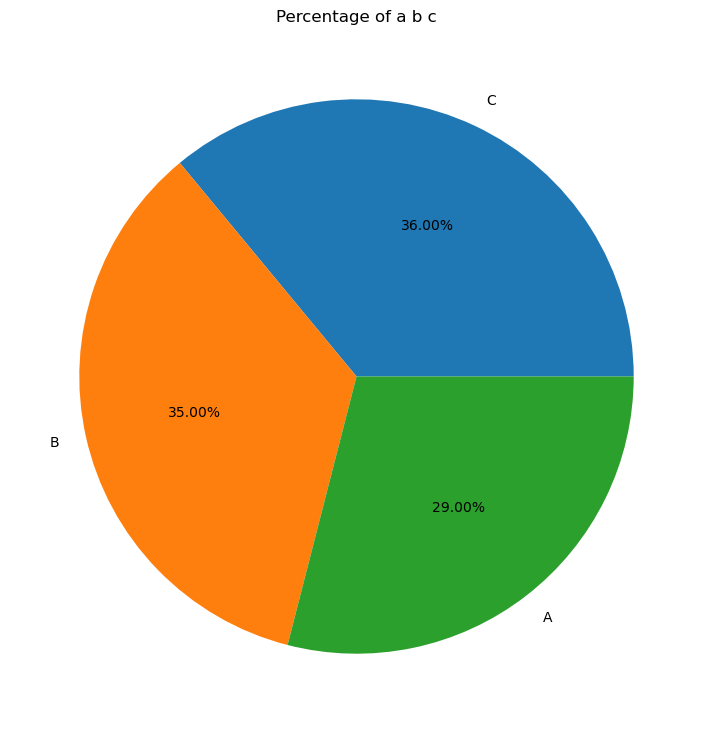

In [125]:
plt.figure(figsize=(10,9))
plt.title('Percentage of a b c')
plt.pie(df['category'].value_counts(), labels=new['category'].value_counts().index,autopct='%2.2f%%')

In [117]:
new=df.sample(20,random_state=

In [119]:
new

,id,value,category
26,27,21,C
86,87,77,C
2,3,65,C
55,56,37,C
75,76,15,B
93,94,80,B
16,17,40,A
73,74,92,B
54,55,1,C
95,96,86,B


([<matplotlib.patches.Wedge at 0x2b502ab3260>,
 [Text(6.735557395310444e-17, 1.1, 'C'),
  Text(-0.7778174593052025, -0.7778174593052023, 'B'),
  Text(0.7778174593052022, -0.7778174593052025, 'A')],
 [Text(3.6739403974420595e-17, 0.6, '50.00%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.00%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00%')])

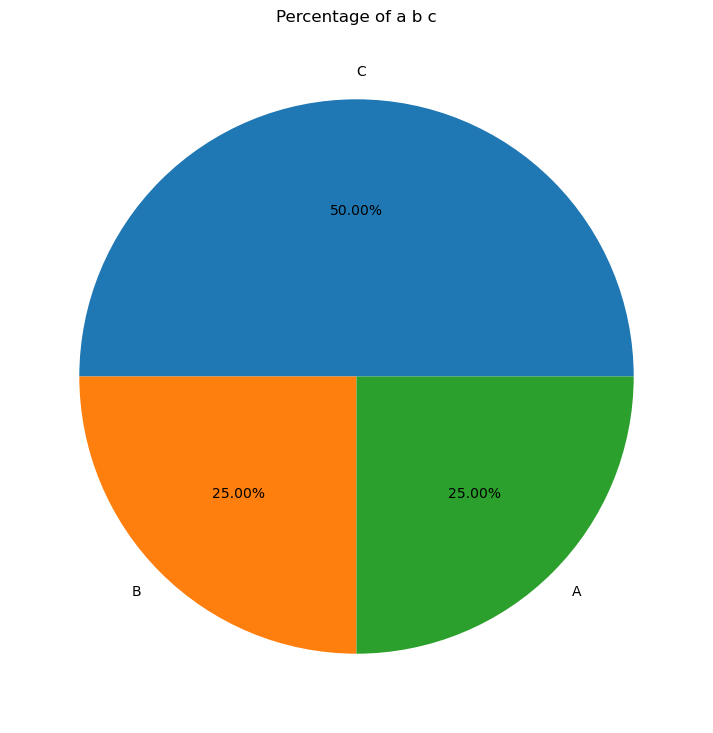

In [123]:
plt.figure(figsize=(10,9))
plt.title('Percentage of a b c')
plt.pie(new['category'].value_counts(), labels=new['category'].value_counts().index,autopct='%2.2f%%')

In [145]:
def stratified_sample(df, strata_col, sample_size):
    # Group by the strata column
    grouped = df.groupby(strata_col)
    
    # Calculate sample size per group
    n_per_group = sample_size // grouped.ngroups
    
    # Perform stratified sampling
    stratified_sample = grouped.apply(lambda x: x.sample(n=n_per_group, random_state=1)).reset_index(drop=True)
    
    return stratified_sample


In [147]:
sdf=stratified_sample(df,'category',21)

C:\Users\duasp\AppData\Local\Temp\ipykernel_6680\1575097584.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = grouped.apply(lambda x: x.sample(n=n_per_group, random_state=1)).reset_index(drop=True)


In [149]:
sdf

,id,value,category
0,85,48,A
1,98,50,A
2,79,43,A
3,9,37,A
4,61,80,A
5,59,39,A
6,65,32,A
7,71,12,B
8,86,4,B
9,80,85,B


([<matplotlib.patches.Wedge at 0x2b502b3e2d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'A'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'B'),
  Text(0.5500001486524352, -0.9526278583383436, 'C')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

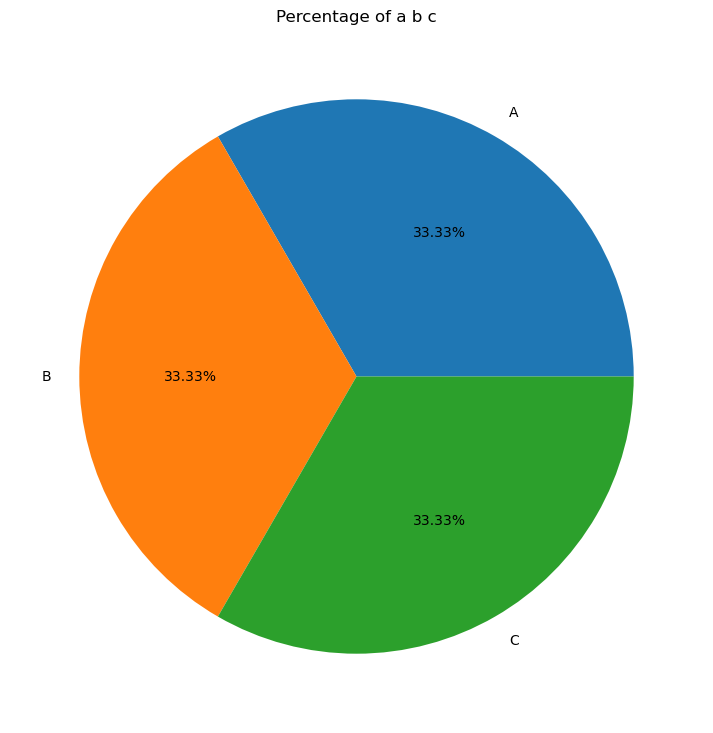

In [151]:
plt.figure(figsize=(10,9))
plt.title('Percentage of a b c')
plt.pie(sdf['category'].value_counts(), labels=sdf['category'].value_counts().index,autopct='%2.2f%%')

In [161]:
#propotional stratified sampling
def propotional_stratified_sample(df,strata_col,sample_size):
    #group byt the strta column
    grouped=df.groupby(strata_col)
    #perform propotional sampling
    stratified_sample=grouped.apply(lambda x: x.sample(frac=sample_size/len(df), random_state=0)).reset_index(drop=True)
    return stratified_sample

In [163]:
ndf=propotional_stratified_sample(df,'category',20)

C:\Users\duasp\AppData\Local\Temp\ipykernel_6680\2271900090.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample=grouped.apply(lambda x: x.sample(frac=sample_size/len(df), random_state=0)).reset_index(drop=True)


([<matplotlib.patches.Wedge at 0x2b50302d430>,
 [Text(0.4993895680663529, 0.9801071672559597, 'A'),
  Text(-1.086457184321308, -0.1720778505113766, 'C'),
  Text(0.6465637441936392, -0.8899187180267097, 'B')],
 [Text(0.27239430985437424, 0.5346039094123416, '35.00%'),
  Text(-0.5926130096298043, -0.09386064573347815, '35.00%'),
  Text(0.3526711331965304, -0.48541020983275074, '30.00%')])

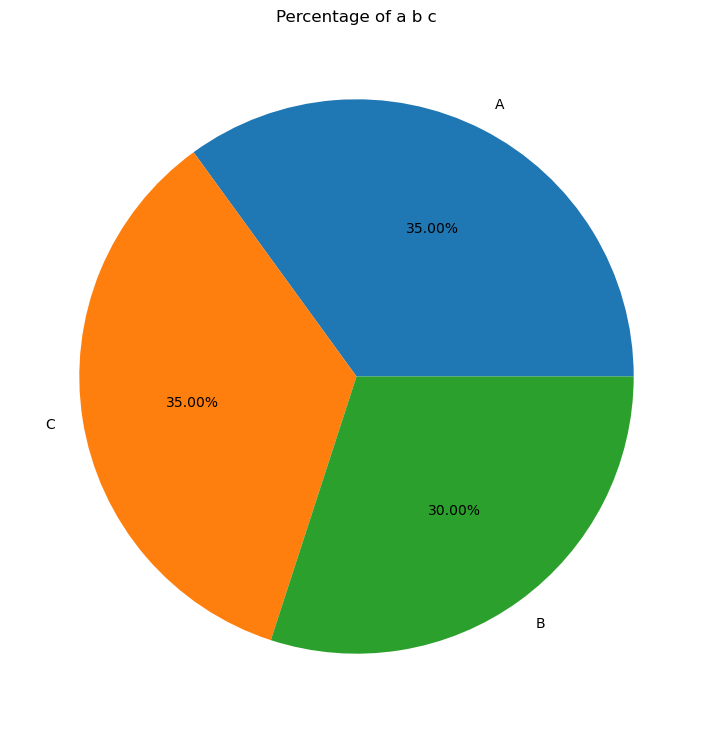

In [165]:
plt.figure(figsize=(10,9))
plt.title('Percentage of a b c')
plt.pie(ndf['category'].value_counts(), labels=ndf['category'].value_counts().index,autopct='%2.2f%%')

In [284]:
iris=pd.read_csv('C:/Users/duasp/datasets/iris.csv')

In [286]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


([<matplotlib.patches.Wedge at 0x2b5057f6390>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.33%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '33.33%'),
  Text(0.30000008108314646, -0.5196151954572783, '33.33%')])

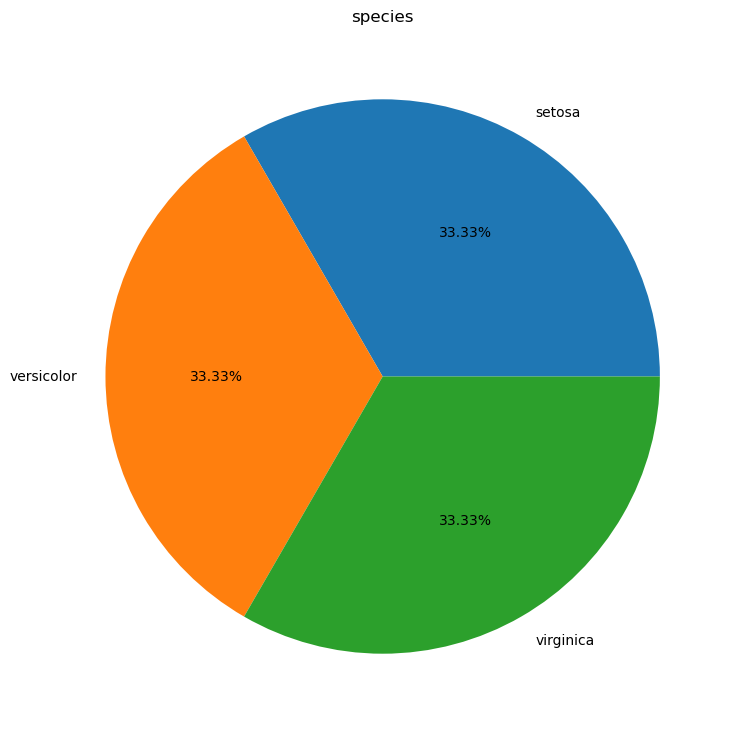

In [290]:
plt.figure(figsize=(10,9))
plt.title('species')
plt.pie(iris['species'].value_counts(), labels=iris['species'].value_counts().index,autopct='%2.2f%%')

In [296]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [298]:
from sklearn.model_selection import train_test_split

In [300]:
train,test=train_test_split(iris,random_state=0)

In [304]:
train['species'].value_counts()

species
virginica     41
setosa        37
versicolor    34
Name: count, dtype: int64

In [306]:
test['species'].value_counts()

species
versicolor    16
setosa        13
virginica      9
Name: count, dtype: int64

In [310]:
train,test=train_test_split(iris,random_state=0,stratify=iris['species'])

In [312]:
train['species'].value_counts()

species
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

In [314]:
test['species'].value_counts()

species
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64

<h4>Cluster Based Sampling</h4>

In [228]:
df=pd.DataFrame({
    'id':range(1,101),
    'value':np.random.randint(1,100,100),
    'cluster':np.random.choice(['cluster1','cluster2','cluster3','cluster4','cluster5'],100)

})

In [232]:
df

,id,value,cluster
0,1,79,cluster1
1,2,83,cluster3
2,3,70,cluster4
3,4,59,cluster4
4,5,5,cluster4
...,...,...,...
95,96,68,cluster3
96,97,45,cluster4
97,98,84,cluster3
98,99,46,cluster3


In [206]:
def cluster_sample(df, cluster_col, num_clusters):
    # Identify unique clusters
    clusters = df[cluster_col].unique()
    
    # Randomly select clusters
    selected_clusters = np.random.choice(clusters, size=num_clusters, replace=False)
    
    # Create a sample DataFrame containing all records from the selected clusters
    cluster_sample = df[df[cluster_col].isin(selected_clusters)].reset_index(drop=True)
    
    return cluster_sample

In [220]:
cluster_sample(df,'cluster',2)

,id,value,cluster
0,1,19,cluster4
1,2,41,cluster4
2,4,80,cluster3
3,6,39,cluster4
4,7,94,cluster4
5,12,25,cluster3
6,14,83,cluster4
7,17,36,cluster4
8,20,70,cluster3
9,23,33,cluster3


<h4>Systematic Sampling</h4>

In [278]:
df=pd.DataFrame({
    'id':range(1,101),
    'value': np.random.randint(1,100,100)
})

In [280]:
def systematic_sample(df,sample_size):
    #calculate the sampling interval
    k=len(df)//sample_size
    #generate a random start
    start=np.random.randint(0,k)
    #select every k-th element starting from the random start
    systematic_sample=df.iloc[start::k].reset_index(drop=True)
    return systematic_sample

In [282]:
systematic_sample(df,20)

,id,value
0,2,2
1,7,34
2,12,84
3,17,23
4,22,16
5,27,81
6,32,81
7,37,83
8,42,16
9,47,58
